In [2]:
import pandas as pd

# Load trader dataset
trader_df = pd.read_csv(r"C:\Users\Admin\Downloads\historical_data.csv")

# Show first 5 rows
print(trader_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [3]:
sentiment_df = pd.read_csv(r"C:\Users\Admin\Downloads\fear_greed_index.csv")

print(sentiment_df.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [4]:
# Keep useful columns and rename them
sentiment_df = sentiment_df[['date', 'value', 'classification']].copy()
sentiment_df.rename(columns={'date': 'Date', 
                             'value': 'SentimentValue', 
                             'classification': 'SentimentClass'}, inplace=True)

# Convert Date to datetime
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])


In [5]:
sentiment_df.head()


,Date,SentimentValue,SentimentClass
0,2018-02-01,30,Fear
1,2018-02-02,15,Extreme Fear
2,2018-02-03,40,Fear
3,2018-02-04,24,Extreme Fear
4,2018-02-05,11,Extreme Fear


In [6]:
# Convert Timestamp IST to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Extract Date only
trader_df['Date'] = trader_df['Timestamp IST'].dt.date
trader_df['Date'] = pd.to_datetime(trader_df['Date'])

# Check first few rows
trader_df[['Account','Coin','Closed PnL','Date']].head()


,Account,Coin,Closed PnL,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02


In [7]:
trader_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [8]:
merged_df = pd.merge(trader_df, sentiment_df, on="Date", how="left")

# Show merged sample
merged_df[['Account','Coin','Closed PnL','Date','SentimentValue','SentimentClass']].head()


,Account,Coin,Closed PnL,Date,SentimentValue,SentimentClass
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,80.0,Extreme Greed


In [9]:
# Average profit/loss under each sentiment
avg_pnl = merged_df.groupby("SentimentClass")["Closed PnL"].mean()

print(avg_pnl)


SentimentClass
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


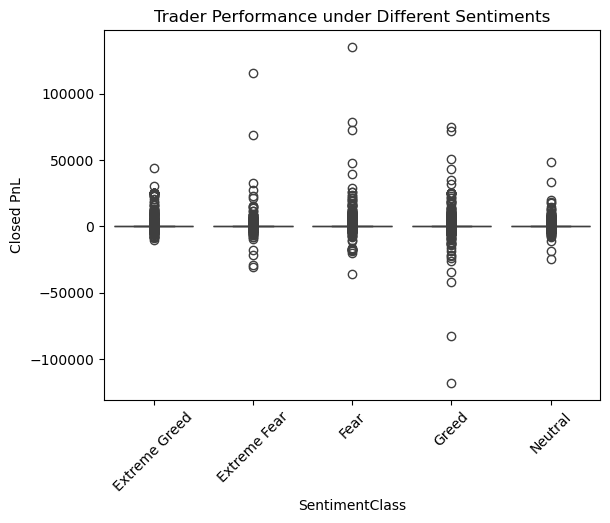

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of trader performance under different sentiments
sns.boxplot(x="SentimentClass", y="Closed PnL", data=merged_df)
plt.title("Trader Performance under Different Sentiments")
plt.xticks(rotation=45)
plt.show()


In [11]:
# Top traders by average PnL under each sentiment
ranked = merged_df.groupby(["Account","SentimentClass"])["Closed PnL"].mean().reset_index()
ranked = ranked.sort_values(by="Closed PnL", ascending=False)

print(ranked.head(10))


                                        Account SentimentClass   Closed PnL
46   0x430f09841d65beb3f27765503d0f850b8bce7713  Extreme Greed  8285.663252
39   0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6        Neutral  4009.581548
44   0x420ab45e0bd8863569a5efbb9c05d91f40624641        Neutral  1547.784656
0    0x083384f897ee0f19899168e3b1bec365f52a9012   Extreme Fear  1247.692214
42   0x420ab45e0bd8863569a5efbb9c05d91f40624641           Fear  1016.819167
80   0x72c6a4624e1dffa724e6d00d64ceae698af892a0   Extreme Fear   900.002541
78   0x72743ae2822edd658c0c50608fd7c5c501b2afbd          Greed   764.916220
135  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  Extreme Greed   672.735763
2    0x083384f897ee0f19899168e3b1bec365f52a9012           Fear   626.194346
3    0x083384f897ee0f19899168e3b1bec365f52a9012          Greed   482.089321
